In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/JedhaBootcamp/FULL_STACK_24_WEEK_PROGRAM/master/S1.0%20--%20Projet%20-%20FRAUDULENT%20ACTIVITIES/S10-A%20-%20Projet%20-%20Fraudulent%20Activities/Fraudulent%20Activities/Datasets/Fraud_Data.csv?token=AGKBMYI4TL5RVH7RCO2UNYK7ELPAK")

In [3]:
ip_address = pd.read_csv("https://raw.githubusercontent.com/JedhaBootcamp/FULL_STACK_24_WEEK_PROGRAM/master/S1.0%20--%20Projet%20-%20FRAUDULENT%20ACTIVITIES/S10-A%20-%20Projet%20-%20Fraudulent%20Activities/Fraudulent%20Activities/Datasets/IpAddress_to_Country.csv?token=AGKBMYPYE6LWWNJXIEF7SUK7ELPEG")

In [4]:
fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [5]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [6]:
ip_address.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [7]:
ip_address.describe()

,lower_bound_ip_address,upper_bound_ip_address
count,1.388460e+05,1.388460e+05
mean,2.724532e+09,2.724557e+09
std,8.975215e+08,8.974979e+08
min,1.677722e+07,1.677747e+07
25%,1.919930e+09,1.920008e+09
50%,3.230887e+09,3.230888e+09
75%,3.350465e+09,3.350466e+09
max,3.758096e+09,3.758096e+09


In [8]:
ip_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [9]:
len(fraud) == len(ip_address)

False

In [10]:
country = len(fraud) * [0]

for ind, row in fraud.iterrows():
    temp = ip_address[(ip_address['lower_bound_ip_address'] < row['ip_address']) & 
           (ip_address['upper_bound_ip_address'] > row['ip_address'])]['country']
    
    if len(temp) == 1:
        country[ind] = temp.values[0]

fraud['country'] = country

In [11]:
fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [12]:
fraud["country"].value_counts()

United States                    58049
0                                21966
China                            12038
Japan                             7306
United Kingdom                    4490
                                 ...  
Madagascar                           1
San Marino                           1
Saint Martin                         1
Gambia                               1
Bonaire; Sint Eustatius; Saba        1
Name: country, Length: 182, dtype: int64

In [13]:
fraud_copy = fraud[fraud.country != 0]
fraud_copy["country"].value_counts()

United States        58049
China                12038
Japan                 7306
United Kingdom        4490
Korea Republic of     4162
                     ...  
Gambia                   1
Yemen                    1
Saint Martin             1
Madagascar               1
South Sudan              1
Name: country, Length: 181, dtype: int64

In [14]:
from datetime import datetime
from datetime import timedelta
fraud_copy["signup_time"] = pd.to_datetime(fraud_copy["signup_time"], errors="coerce")
fraud_copy["purchase_time"] = pd.to_datetime(fraud_copy["purchase_time"], errors="coerce")
fraud_copy["time_to_purchase"] = fraud_copy["purchase_time"] - fraud_copy["signup_time"]
fraud_copy["purchase_day"] = fraud_copy["purchase_time"].dt.dayofweek
fraud_copy["purchase_hour"] = fraud_copy["purchase_time"].dt.hour
fraud_copy["time_to_purchase"] = fraud_copy["time_to_purchase"].dt.total_seconds()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [15]:
fraud_copy.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,time_to_purchase,purchase_day,purchase_hour
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,4506682.0,5,2
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944.0,0,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1.0,3,18
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,4361461.0,2,18
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0,Canada,4240931.0,3,8


In [16]:
fraud_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129146 entries, 0 to 151110
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           129146 non-null  int64         
 1   signup_time       129146 non-null  datetime64[ns]
 2   purchase_time     129146 non-null  datetime64[ns]
 3   purchase_value    129146 non-null  int64         
 4   device_id         129146 non-null  object        
 5   source            129146 non-null  object        
 6   browser           129146 non-null  object        
 7   sex               129146 non-null  object        
 8   age               129146 non-null  int64         
 9   ip_address        129146 non-null  float64       
 10  class             129146 non-null  int64         
 11  country           129146 non-null  object        
 12  time_to_purchase  129146 non-null  float64       
 13  purchase_day      129146 non-null  int64         
 14  purc

In [17]:
fraud_copy.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,time_to_purchase,purchase_day,purchase_hour
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,4506682.0,5,2
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944.0,0,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1.0,3,18
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,4361461.0,2,18
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0,Canada,4240931.0,3,8


In [18]:
fraud_copy = fraud_copy[["signup_time","purchase_time","purchase_value","source","browser","sex","age","ip_address","class","country"]]

In [19]:
fraud_copy.columns

Index(['signup_time', 'purchase_time', 'purchase_value', 'source', 'browser',
       'sex', 'age', 'ip_address', 'class', 'country'],
      dtype='object')

In [34]:
fraud_copy.groupby("country").sum().sort_values(by="class",ascending=False).head(10)

,purchase_value,age,ip_address,class
country,,,,
United States,2139619,1925519,9.392926e+13,5551
China,444476,398618,2.482201e+13,1043
Japan,268685,242054,1.688256e+13,715
United Kingdom,165570,148445,7.307505e+12,477
Korea Republic of,157410,136509,8.964303e+12,380
Canada,111488,97236,5.871151e+12,348
France,115632,103881,5.813599e+12,300
Brazil,110325,98588,9.245883e+12,270
Germany,135700,119855,7.189450e+12,262


In [20]:
fraud_copy.info()
# pas de NA

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129146 entries, 0 to 151110
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   signup_time     129146 non-null  datetime64[ns]
 1   purchase_time   129146 non-null  datetime64[ns]
 2   purchase_value  129146 non-null  int64         
 3   source          129146 non-null  object        
 4   browser         129146 non-null  object        
 5   sex             129146 non-null  object        
 6   age             129146 non-null  int64         
 7   ip_address      129146 non-null  float64       
 8   class           129146 non-null  int64         
 9   country         129146 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 10.8+ MB


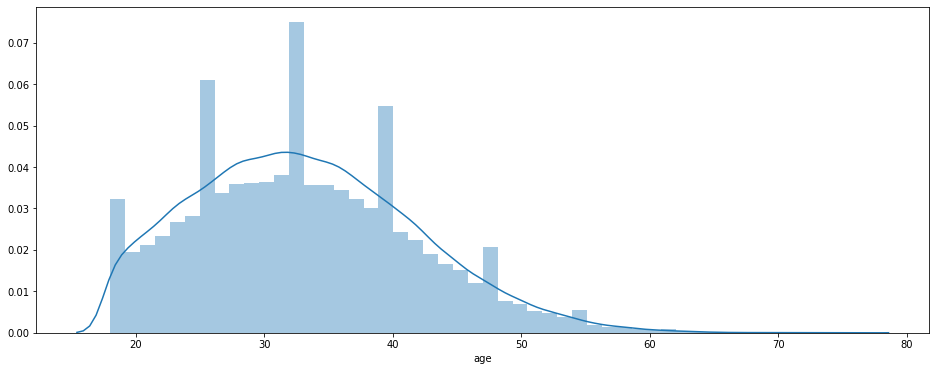

In [26]:
plt.figure(figsize=(16, 6))
sns.distplot(fraud_copy["age"])